# Project 3: Pandemic and Obesity
**Student:** Sam Lim<br>
**Instructor:** James Irving<br>
**Date:** May 27, 21<br>
**Revision:** June 3, 21<br>


## Overview
The project aims to create models using categorical data to show how to manipulate the categorical data to be used in models. In the midst of the pandemic, I saw a rather significant increase in my weight and curious as to how some well-known factors affected a person's obesity level. I chose my local health departments as my clients to help them determine what factors played the biggest role in a person's obesity level. 


### Business Problem
The St. Joseph public health department and South Bend Health Clinic want to help improve the overall health of their residents. Through the progression of pandemic, people's lifestyles have changed drastically with a general decrease in overall physical activity and increase in time spent on electronic devices. Since the decrease in physical activity could lead to obesity, health officials are looking to see how much of the well-known factors that are associated with obesity can affect a person's obesity level. 

Veggies: 1: Never, 2: Sometimes, 3: Always<br>
H2O: 1: Less than 1L, 2: Less than 2L, 3: More than 2L<br>
Physical Activity: 0: None, 1: 1-2 days, 2: 2-4 days, 3: 4-5 days<br>
Time on Devices: 0: None, 1: 2 hrs or less, 2: 3-5 hrs, 3: 5+hrs<br>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

from sklearn import metrics
from sklearn import tree, svm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from scipy.spatial.distance import euclidean
from scipy import stats

pd.set_option('display.max_columns', None)

## Data Cleaning and Preparation

In [28]:
obesity=pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv', header=0)
obesity.head()

,Gender,Age,Height,Weight,Family_Obesity_History,Frequent_HighCalorie_Food,Veggies,Num_of_Meals,Food_btw_Meals,Smoke,H2O,Calorie_Monitor,Physical_Activity,Time_On_Devices,Alcohol_Consump,Transportation,Obesity_Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


The data itself did not have any missing values, so it was unneccessary to drop any of them initially

In [29]:
print(len(obesity))
obesity.isna().sum()

2111


Gender                       0
Age                          0
Height                       0
Weight                       0
Family_Obesity_History       0
Frequent_HighCalorie_Food    0
Veggies                      0
Num_of_Meals                 0
Food_btw_Meals               0
Smoke                        0
H2O                          0
Calorie_Monitor              0
Physical_Activity            0
Time_On_Devices              0
Alcohol_Consump              0
Transportation               0
Obesity_Level                0
dtype: int64

In [30]:
obesity.nunique()

Gender                          2
Age                          1402
Height                       1574
Weight                       1525
Family_Obesity_History          2
Frequent_HighCalorie_Food       2
Veggies                       810
Num_of_Meals                  635
Food_btw_Meals                  4
Smoke                           2
H2O                          1268
Calorie_Monitor                 2
Physical_Activity            1190
Time_On_Devices              1129
Alcohol_Consump                 4
Transportation                  5
Obesity_Level                   7
dtype: int64

While doing the train test split, I noticed that there were too many columns for the number of options in each categorical data. Using nunique, I was able to find out that while some variables had string values to represent each option of the category, the variables that had their  options represented in numerical form had decimal points. 

In [31]:
obesity['Obesity_Level'].value_counts(1)

zObesity_Type_I        0.166272
zObesity_Type_III      0.153482
zObesity_Type_II       0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: Obesity_Level, dtype: float64

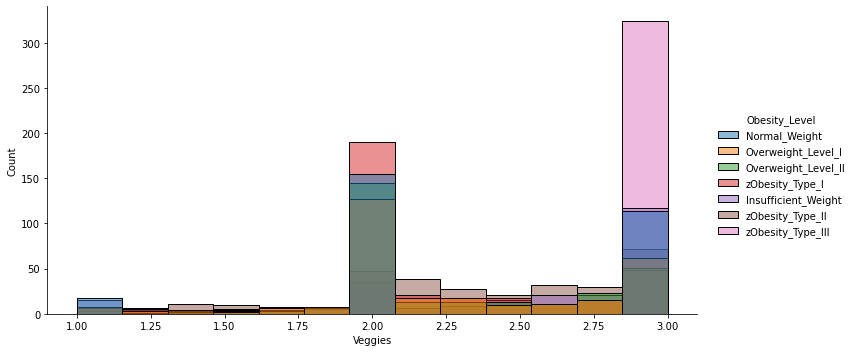

In [32]:
sns.displot(data=obesity, x= 'Veggies', hue='Obesity_Level', aspect=2)

In [33]:
obesity['Age']=obesity['Age'].astype('float')

In [34]:
obesity.head()

,Gender,Age,Height,Weight,Family_Obesity_History,Frequent_HighCalorie_Food,Veggies,Num_of_Meals,Food_btw_Meals,Smoke,H2O,Calorie_Monitor,Physical_Activity,Time_On_Devices,Alcohol_Consump,Transportation,Obesity_Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [35]:
# Here I am dropping a single row that had an 'Always' on Alcohol_Consump because there was only 1
# person from the entire data. This later threw off X_train and X_test because there was only 1 person
# that always drank alcohol; therefore, could not compare the two splits
obesity.loc[obesity['Alcohol_Consump']=="Always"]
obesity=obesity.drop(labels=26)

In [36]:
# Making another data frame to store original values because SMOTE
obesity2=obesity.copy()

Before doing the train test split, I had to clean some of the categorical variables and the numerical varaibles. Because the dataset description had stated that variables such as Veggies, Num_of_Meals, H20, etc were categorical, I had to round the float numbers so that it represented the correct category. After the floats were rounded, I noticed that only one person had an alcohol consumption level of always. Because he was the only one who had such alcohol consumption level, I deemed it as an outlier and dropped it. This was also necessary because only one of either the test or training data set would contain this person, and therefore, the number of columns after one hot encoding would be different from each other.

In [37]:
# while it is a better practice to adjust the data after train test split, I am only rounding these numerical values
# because 1. it only changes the values to a whole number or other integers that fit the data description
# 2. because it would be the same if the data were changed after train test splitting, but would just be additional
# lines of unneccessary code
obesity['Age']=round(obesity['Age'],1)
obesity['Veggies']=round(obesity['Veggies'],0)
obesity['Num_of_Meals']=round(obesity['Num_of_Meals'],0)
obesity['H2O']=round(obesity['H2O'],0)
obesity['Physical_Activity']=round(obesity['Physical_Activity'],0)
obesity['Time_On_Devices']=round(obesity['Time_On_Devices'],0)

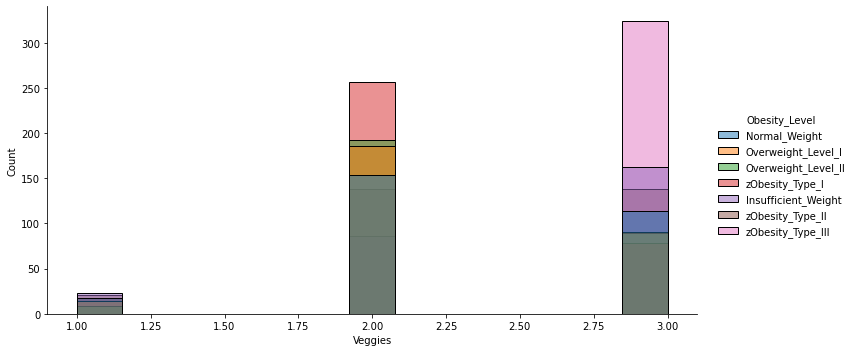

In [38]:
sns.displot(data=obesity, x= 'Veggies', hue='Obesity_Level', aspect=2)

1. markdown cells to represent all the work/thoughts that went into making that decision
2. make a copy of obesity before rounding try modeling and only counting the variables with the string as categorical and have other variables with decimals as numerical

In [39]:
obesity['Obesity_Level'].value_counts()

zObesity_Type_I        351
zObesity_Type_III      324
zObesity_Type_II       297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          286
Insufficient_Weight    272
Name: Obesity_Level, dtype: int64

After the initial data prepping, train test split was performed

In [40]:
weight_dict={'Insufficient_Weight': 'Normal_Weight',
             'Overweight_Level_I': 'Overweight', 
             'Normal_Weight': 'Normal_Weight',
             'Overweight_Level_II': 'Overweight', 
             'zObesity_Type_I': 'Obese', 
             'zObesity_Type_II': 'Obese', 
             'zObesity_Type_III': 'Obese'}

weight_dict

{'Insufficient_Weight': 'Normal_Weight',
 'Overweight_Level_I': 'Overweight',
 'Normal_Weight': 'Normal_Weight',
 'Overweight_Level_II': 'Overweight',
 'zObesity_Type_I': 'Obese',
 'zObesity_Type_II': 'Obese',
 'zObesity_Type_III': 'Obese'}

In [41]:
obesity['Obesity_Level']=obesity['Obesity_Level'].replace(weight_dict)
obesity['Obesity_Level'].value_counts()

Obese            972
Overweight       580
Normal_Weight    558
Name: Obesity_Level, dtype: int64

In [42]:
cat_dict={'Normal_Weight':0,
         'Overweight': 1,
         'Obese': 2}

In [43]:
#Train test split
X=obesity.drop(columns=['Obesity_Level', 'Weight','Height'])
y=obesity['Obesity_Level'].map(cat_dict)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)
y_train.value_counts(normalize=True)

2    0.466486
1    0.274204
0    0.259309
Name: Obesity_Level, dtype: float64

In order to only encode the categorical variables, column names were specified, and since the dependent(outcome) variables were also categorical, they were label encoded.

In [44]:
# One hot encoder
# instead of using the actual one hot encoder, I've decided to use get_dummies because three(now one) 
# of the columns are not categorical
columns=['Gender', 'Family_Obesity_History','Frequent_HighCalorie_Food','Veggies','Num_of_Meals',
                        'Food_btw_Meals','Smoke','H2O','Calorie_Monitor','Physical_Activity','Time_On_Devices',
                        'Alcohol_Consump','Transportation'] 
X_train_ohe =pd.get_dummies(X_train, columns= columns, drop_first=True)
X_test_ohe = pd.get_dummies(X_test, columns= columns, drop_first=True)
print(X_test_ohe.columns)
# print(X_train_ohe.columns)

Index(['Age', 'Gender_Male', 'Family_Obesity_History_yes',
       'Frequent_HighCalorie_Food_yes', 'Veggies_2.0', 'Veggies_3.0',
       'Num_of_Meals_2.0', 'Num_of_Meals_3.0', 'Num_of_Meals_4.0',
       'Food_btw_Meals_Frequently', 'Food_btw_Meals_Sometimes',
       'Food_btw_Meals_no', 'Smoke_yes', 'H2O_2.0', 'H2O_3.0',
       'Calorie_Monitor_yes', 'Physical_Activity_1.0', 'Physical_Activity_2.0',
       'Physical_Activity_3.0', 'Time_On_Devices_1.0', 'Time_On_Devices_2.0',
       'Alcohol_Consump_Sometimes', 'Alcohol_Consump_no',
       'Transportation_Bike', 'Transportation_Motorbike',
       'Transportation_Public_Transportation', 'Transportation_Walking'],
      dtype='object')


### "Un-SMOTE'ing" the Data

While reviewing the project, we noticed that the data itself was SMOTE'd. Therefore, we decided that it would be best to treat the variables that were originally meant to be categorical but displayed as numerical data to be displayed as numerical data. <br>
SMOTE'ing is an oversampling technique that creates synthetic data from the minority class or classes. In our case, people in the normal weight category far outweighed the combination of other six categories. While we will not actually un-SMOTE the data, by considering some of the categorical data as numerical, it may be able to paint a more accurate picture of the true sample.

 - SMOTE'd variables: 'Veggies', 'H2O', 'Physical_Activity', 'Num_of_Meals', 'Time_on_Devices'

These variables' values were SMOTE'd, and because of that their values did not correspond to the 

In [45]:
obesity2['Obesity_Level']=obesity['Obesity_Level'].replace(weight_dict)
obesity2['Obesity_Level'].value_counts()

Obese            972
Overweight       580
Normal_Weight    558
Name: Obesity_Level, dtype: int64

In [46]:
#Train test split
X2=obesity2.drop(columns=['Obesity_Level', 'Weight','Height'])
y2=obesity2['Obesity_Level'].map(cat_dict)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 11)
y_train2.value_counts(normalize=True)

2    0.466486
1    0.274204
0    0.259309
Name: Obesity_Level, dtype: float64

In [47]:
columns2= ['Gender', 'Family_Obesity_History','Frequent_HighCalorie_Food','Food_btw_Meals',
           'Smoke','Calorie_Monitor','Alcohol_Consump','Transportation']
X_train_ohe2 =pd.get_dummies(X_train2, columns= columns2, drop_first=True)
X_test_ohe2 = pd.get_dummies(X_test2, columns= columns2, drop_first=True)

## Random Forest
The first type of modeling that I used was the Random Forest classifier.

 - SMOTE'd version of the model: rforest_smote, importances_forest_smote
 
 - un-SMOTE'd version of the model: rforest, importances_forest


### Modeling

In [48]:
# Creating a function that returns the training score, test score, and the confusion matrix when given
# X train, X test, y train, y test, and the type of model
label=list(cat_dict.keys())
def model_score(model, X_train, X_test, y_train, y_test, label=None ):
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    print(metrics.classification_report(y_test, y_hat_test, target_names=label))
    fig, ax= plt.subplots(figsize=(6,6))
    metrics.plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true', 
                                 display_labels= label, ax=ax)
#     plt.xticks(rotation=45)
    print(f'Training Score: {round(model.score(X_train, y_train), 2)}')
    print(f'Test Score: {round(model.score(X_test, y_test), 2)}')


##### SMOTE'd

In [49]:
rforest_smote=RandomForestClassifier(random_state=11)
rforest_smote.fit(X_train_ohe, y_train)

RandomForestClassifier(random_state=11)

               precision    recall  f1-score   support

Normal_Weight       0.82      0.86      0.84       175
   Overweight       0.80      0.71      0.75       175
        Obese       0.88      0.92      0.90       283

     accuracy                           0.84       633
    macro avg       0.83      0.83      0.83       633
 weighted avg       0.84      0.84      0.84       633

Training Score: 1.0
Test Score: 0.84


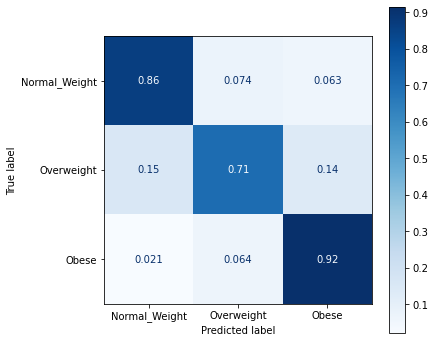

In [50]:
model_score(rforest_smote, X_train_ohe, X_test_ohe, y_train, y_test, label=label)

<AxesSubplot:>

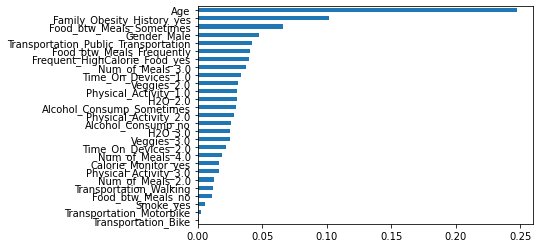

In [25]:
importances_forest_smote=pd.Series(rforest_smote.feature_importances_, index=X_train_ohe.columns)
importances_forest_smote.sort_values(ascending=True).plot(kind='barh')

use these bar graphs for the presentation instead of tables.

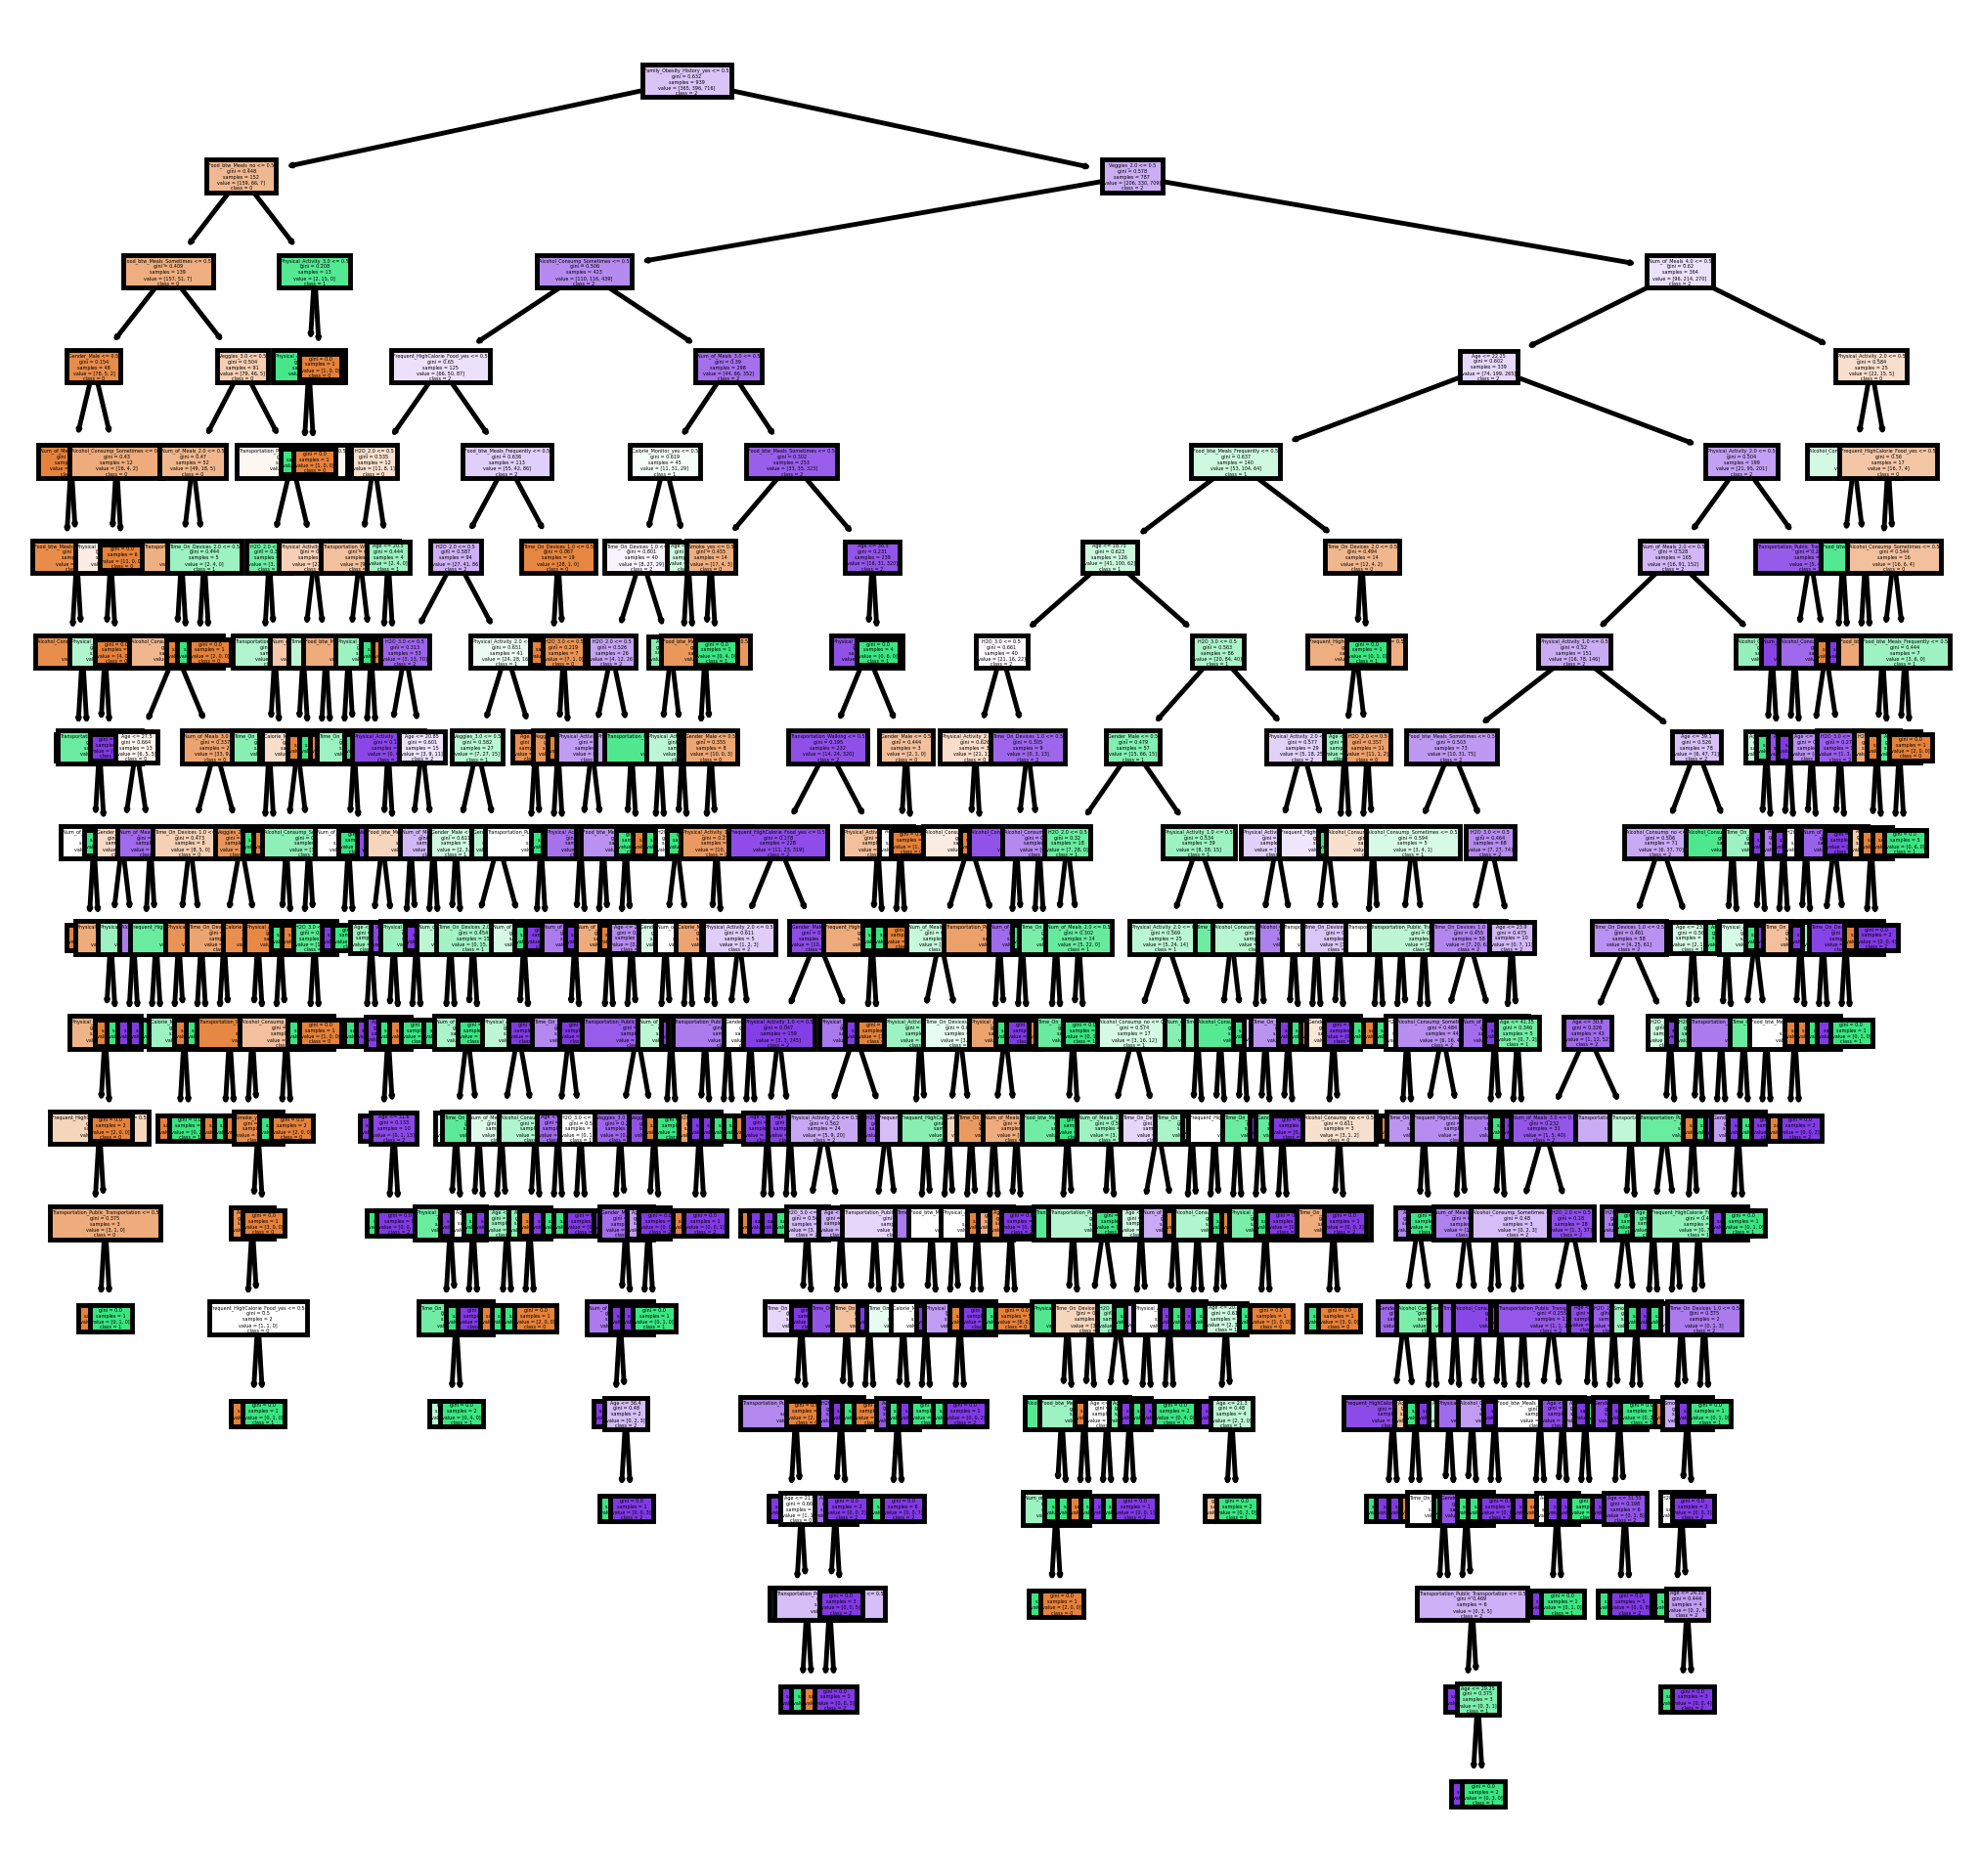

In [51]:
fig=plt.subplots(nrows=1, ncols=1, figsize=(7, 7), dpi=350)
tree_plot=tree.plot_tree(rforest_smote.estimators_[0], feature_names=X_train_ohe.columns, 
                         class_names=np.unique(y_train).astype('str'), filled=True)
plt.show()

As mentioned before, the SMOTE'ing process had altered the categorical data, and therefore, was not an accurate representation of the actual sample data. Therefore, we created another set of Random Forest classifier to show the difference between treating SMOTE'd data as categorical data after rounding them to the nearest whole integer and treating SMOTE'd categorical data as numerical data.

##### Un-SMOTE'd

In [52]:
# Un-SMOTE'd data
rforest=RandomForestClassifier(random_state=11)
rforest.fit(X_train_ohe2, y_train2)

RandomForestClassifier(random_state=11)

               precision    recall  f1-score   support

Normal_Weight       0.82      0.93      0.87       175
   Overweight       0.88      0.74      0.80       175
        Obese       0.92      0.93      0.93       283

     accuracy                           0.88       633
    macro avg       0.87      0.87      0.87       633
 weighted avg       0.88      0.88      0.88       633

Training Score: 1.0
Test Score: 0.88


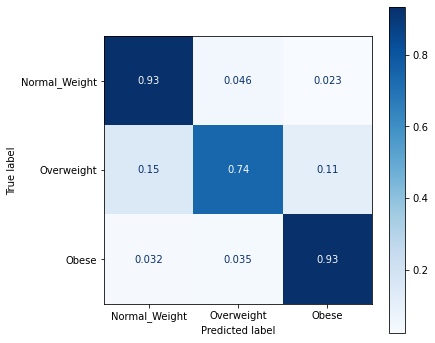

In [53]:
model_score(rforest, X_train_ohe2, X_test_ohe2, y_train2, y_test2, label=label)

<AxesSubplot:>

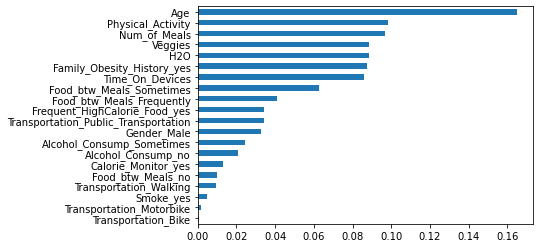

In [54]:
importances_forest=pd.Series(rforest.feature_importances_, index=X_train_ohe2.columns)
importances_forest.sort_values(ascending=True).plot(kind='barh')

Even before performing the grid search, we can see that both the accuracy and the recall rate has increased quite significantly for predicting people in the 'Normal Weight' category. Other categories also saw some improvements, but they were not as drastic as the changes we saw in 'Normal Weight'.<br><br>
I believe that this may be the case because in the actual sample data, the number of people in the 'Normal Weight' category far outnumbered the sum of all other weight classes. 

### Grid Search CV

In order to find which parameters were best for the random forest above, we use grid search to skip the iterative process of replacing each parameters.
<br>
Here we see that for random forest with SMOTE'd data, the best parameters are criterion of gini, with a max depth of 19 and a min samples leaf and split of 1 and 3 respectively. <br> For the tree with un-SMOTE'd data, criterion of entropy, max_depth of 19, and min samples leaf and split of 1 and 3 respectively are the best parameters for the Random Forest.

##### SMOTE'd

In [58]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 18, 19, 20 ],
    'min_samples_split': [ 2, 3],
    'min_samples_leaf': [1, 2 ]
}

gs_tree_smote = GridSearchCV(rforest_smote, param_grid, cv=3)
gs_tree_smote.fit(X_train_ohe, y_train)

gs_tree_smote.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [59]:
rforest_smote2=RandomForestClassifier(criterion='gini', max_depth=19, min_samples_leaf=1, 
                                        min_samples_split=2, random_state=11)
rforest_smote2.fit(X_train_ohe, y_train)

RandomForestClassifier(max_depth=19, random_state=11)

               precision    recall  f1-score   support

Normal_Weight       0.82      0.86      0.84       175
   Overweight       0.79      0.70      0.74       175
        Obese       0.88      0.92      0.90       283

     accuracy                           0.84       633
    macro avg       0.83      0.83      0.83       633
 weighted avg       0.84      0.84      0.84       633

Training Score: 1.0
Test Score: 0.84


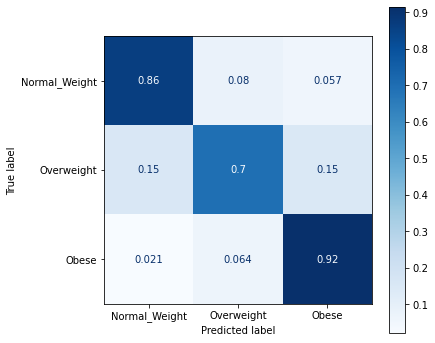

In [62]:
model_score(rforest_smote2, X_train_ohe, X_test_ohe, y_train, y_test, label=label)

<AxesSubplot:>

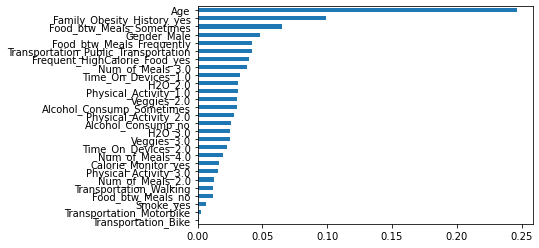

In [63]:
importances_forest_smote2=pd.Series(rforest_smote2.feature_importances_, index=X_train_ohe.columns)
importances_forest_smote2.sort_values(ascending=True).plot(kind='barh')

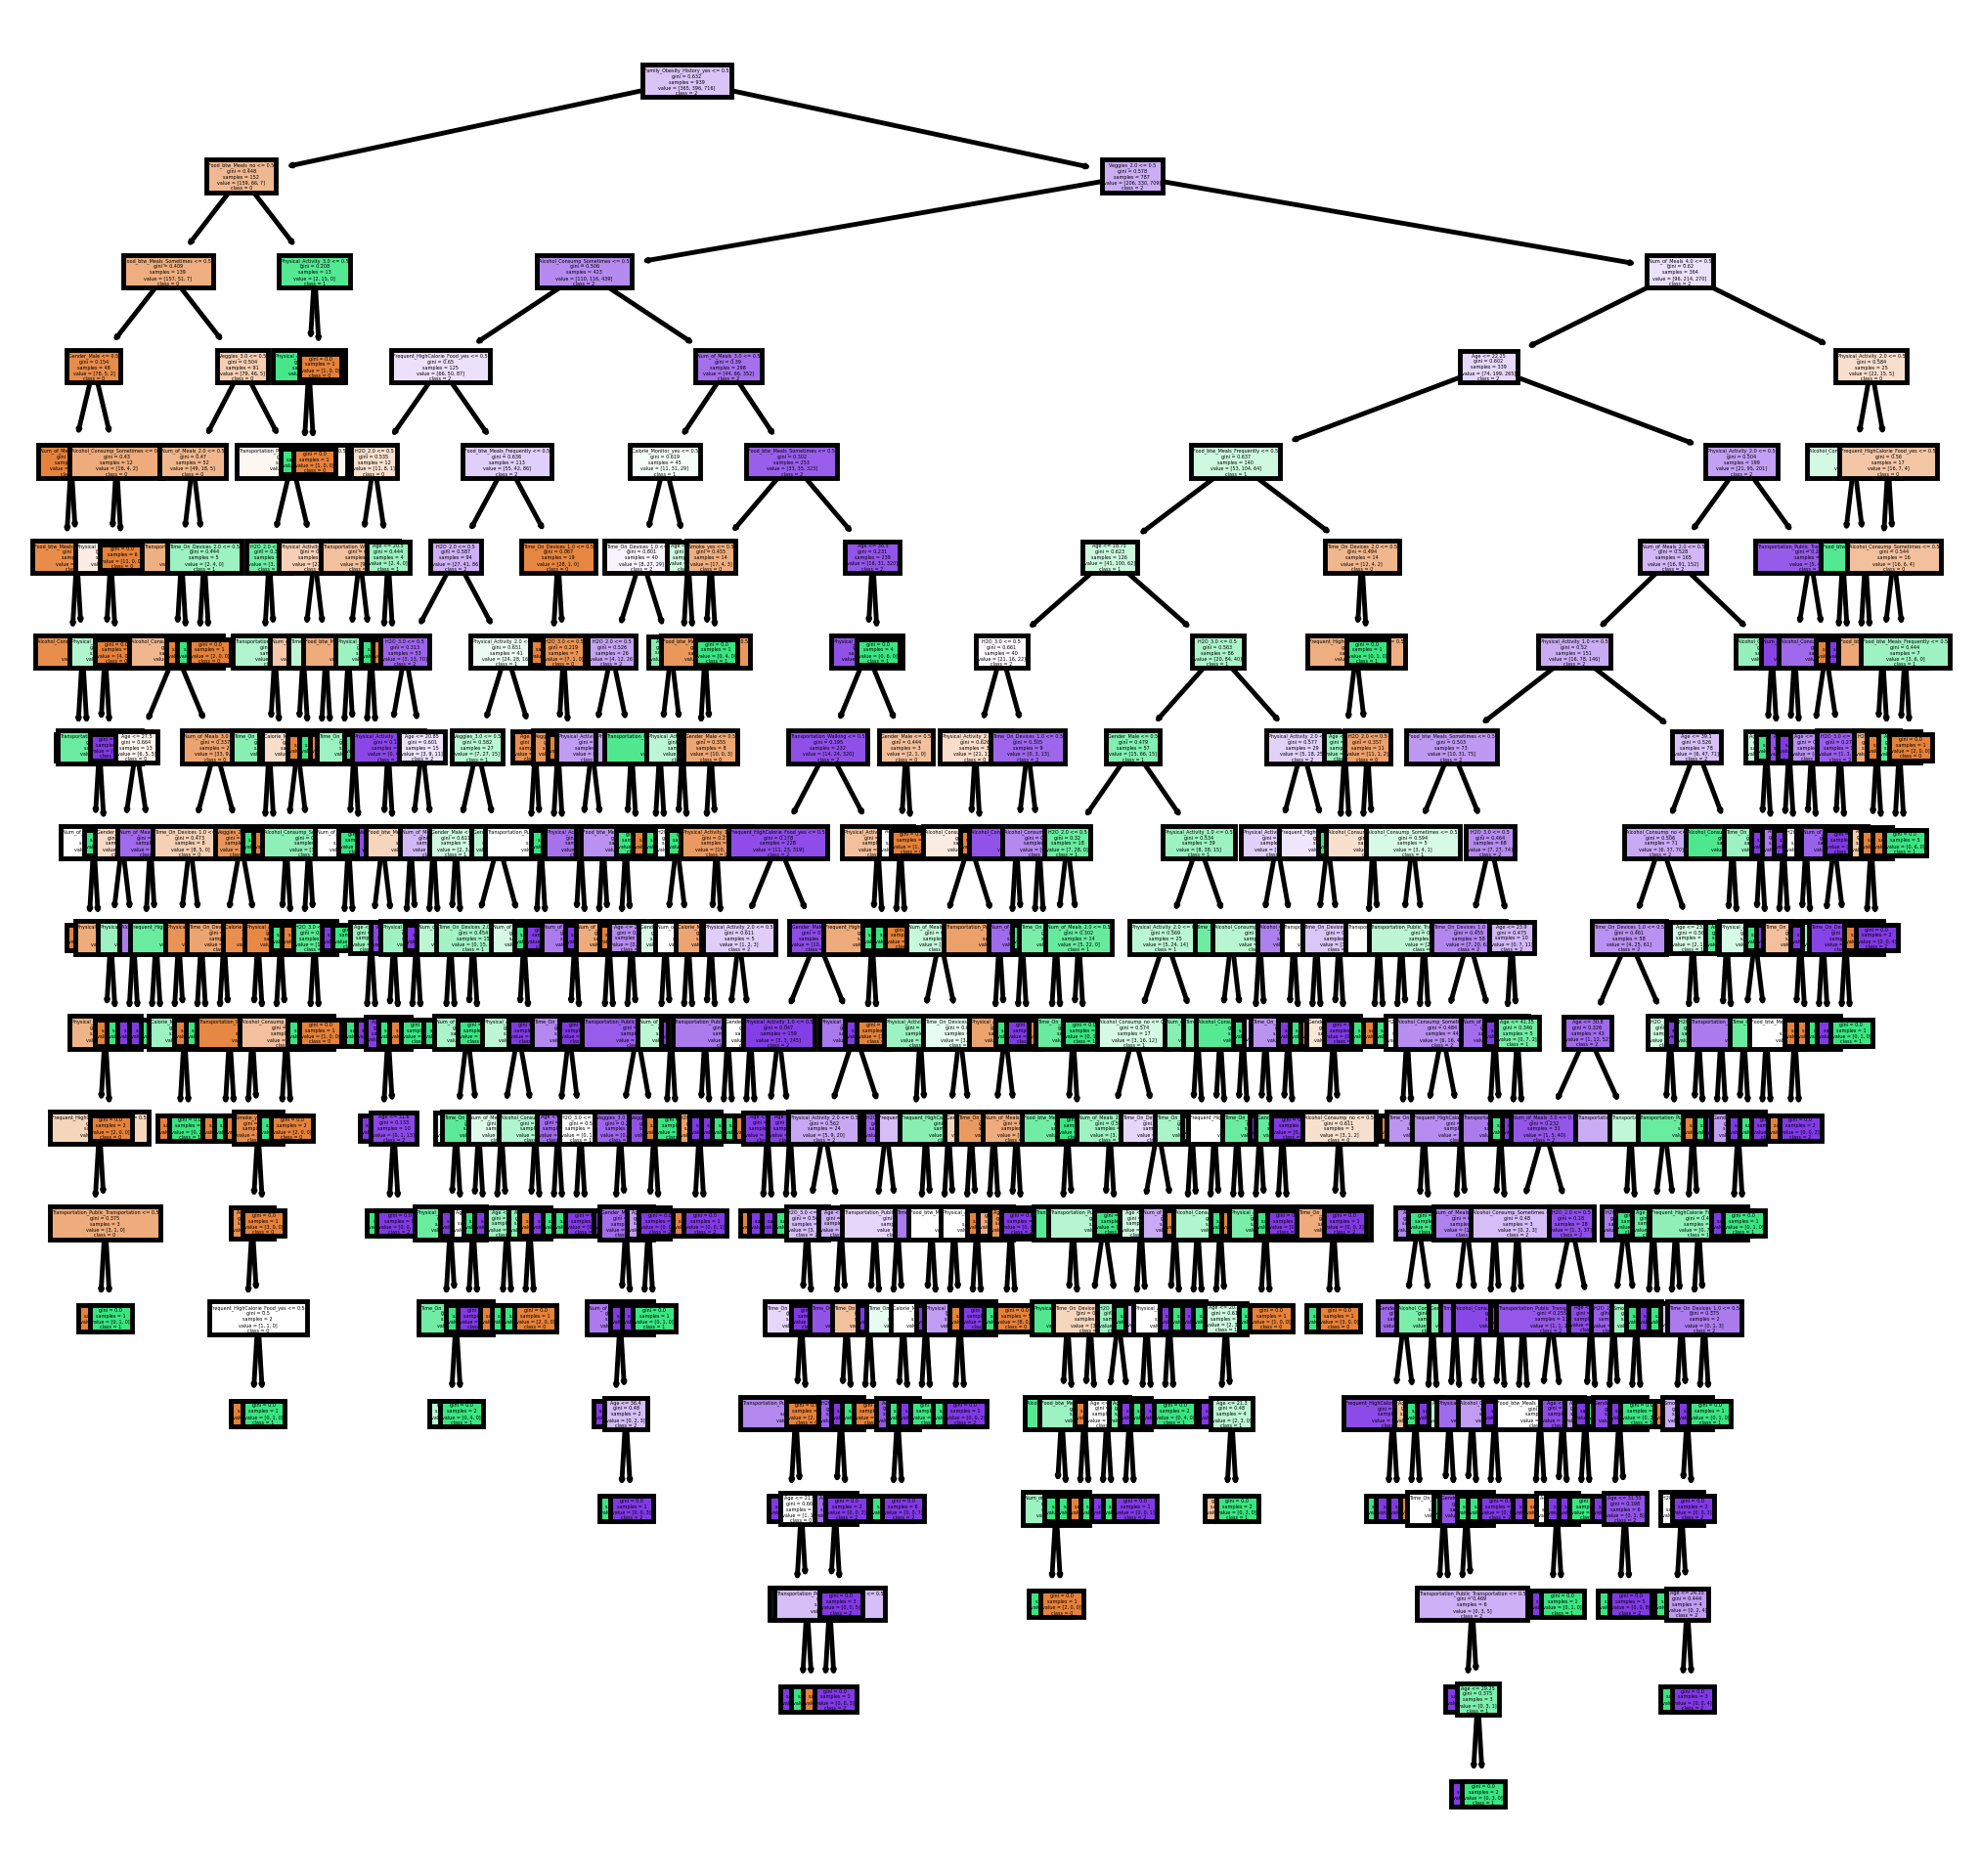

In [64]:
fig=plt.subplots(nrows=1, ncols=1, figsize=(7, 7), dpi=350)
tree_plot=tree.plot_tree(rforest_smote2.estimators_[0], feature_names=X_train_ohe.columns, 
                         class_names=np.unique(y_train).astype('str'), filled=True)
plt.show()

After performing the grid search for SMOTE'd data, we can see that neither the precision nor the recall values have increased. Rather it reduced the recall rate of those in the 'Overweight' category by .01. While the reduction is not a significant value, it still decreased the overall accuracy of the model. 

##### Un-SMOTE'd

In [65]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 18, 19, 20 ],
    'min_samples_split': [ 2, 3, 5],
    'min_samples_leaf': [1, 2 ]
}

gs_tree = GridSearchCV(rforest, param_grid, cv=3)
gs_tree.fit(X_train_ohe2, y_train2)

gs_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [66]:
rforest2=RandomForestClassifier(criterion='entropy', max_depth=19, min_samples_leaf=1, min_samples_split=3, random_state=11)
rforest2.fit(X_train_ohe2, y_train2)

RandomForestClassifier(criterion='entropy', max_depth=19, min_samples_split=3,
                       random_state=11)

               precision    recall  f1-score   support

Normal_Weight       0.83      0.93      0.88       175
   Overweight       0.87      0.74      0.80       175
        Obese       0.92      0.93      0.93       283

     accuracy                           0.88       633
    macro avg       0.87      0.87      0.87       633
 weighted avg       0.88      0.88      0.88       633

Training Score: 1.0
Test Score: 0.88


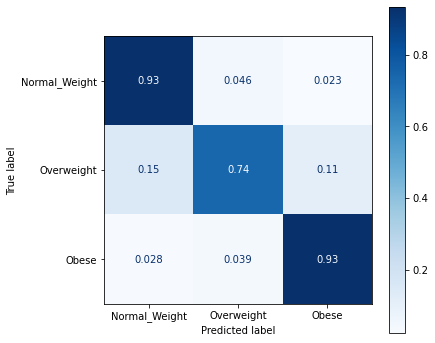

In [67]:
model_score(rforest2, X_train_ohe2, X_test_ohe2, y_train2, y_test2, label=label)

<AxesSubplot:>

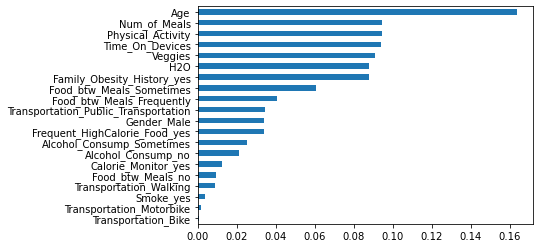

In [68]:
importances_forest2=pd.Series(rforest2.feature_importances_, index=X_train_ohe2.columns)
importances_forest2.sort_values(ascending=True).plot(kind='barh')

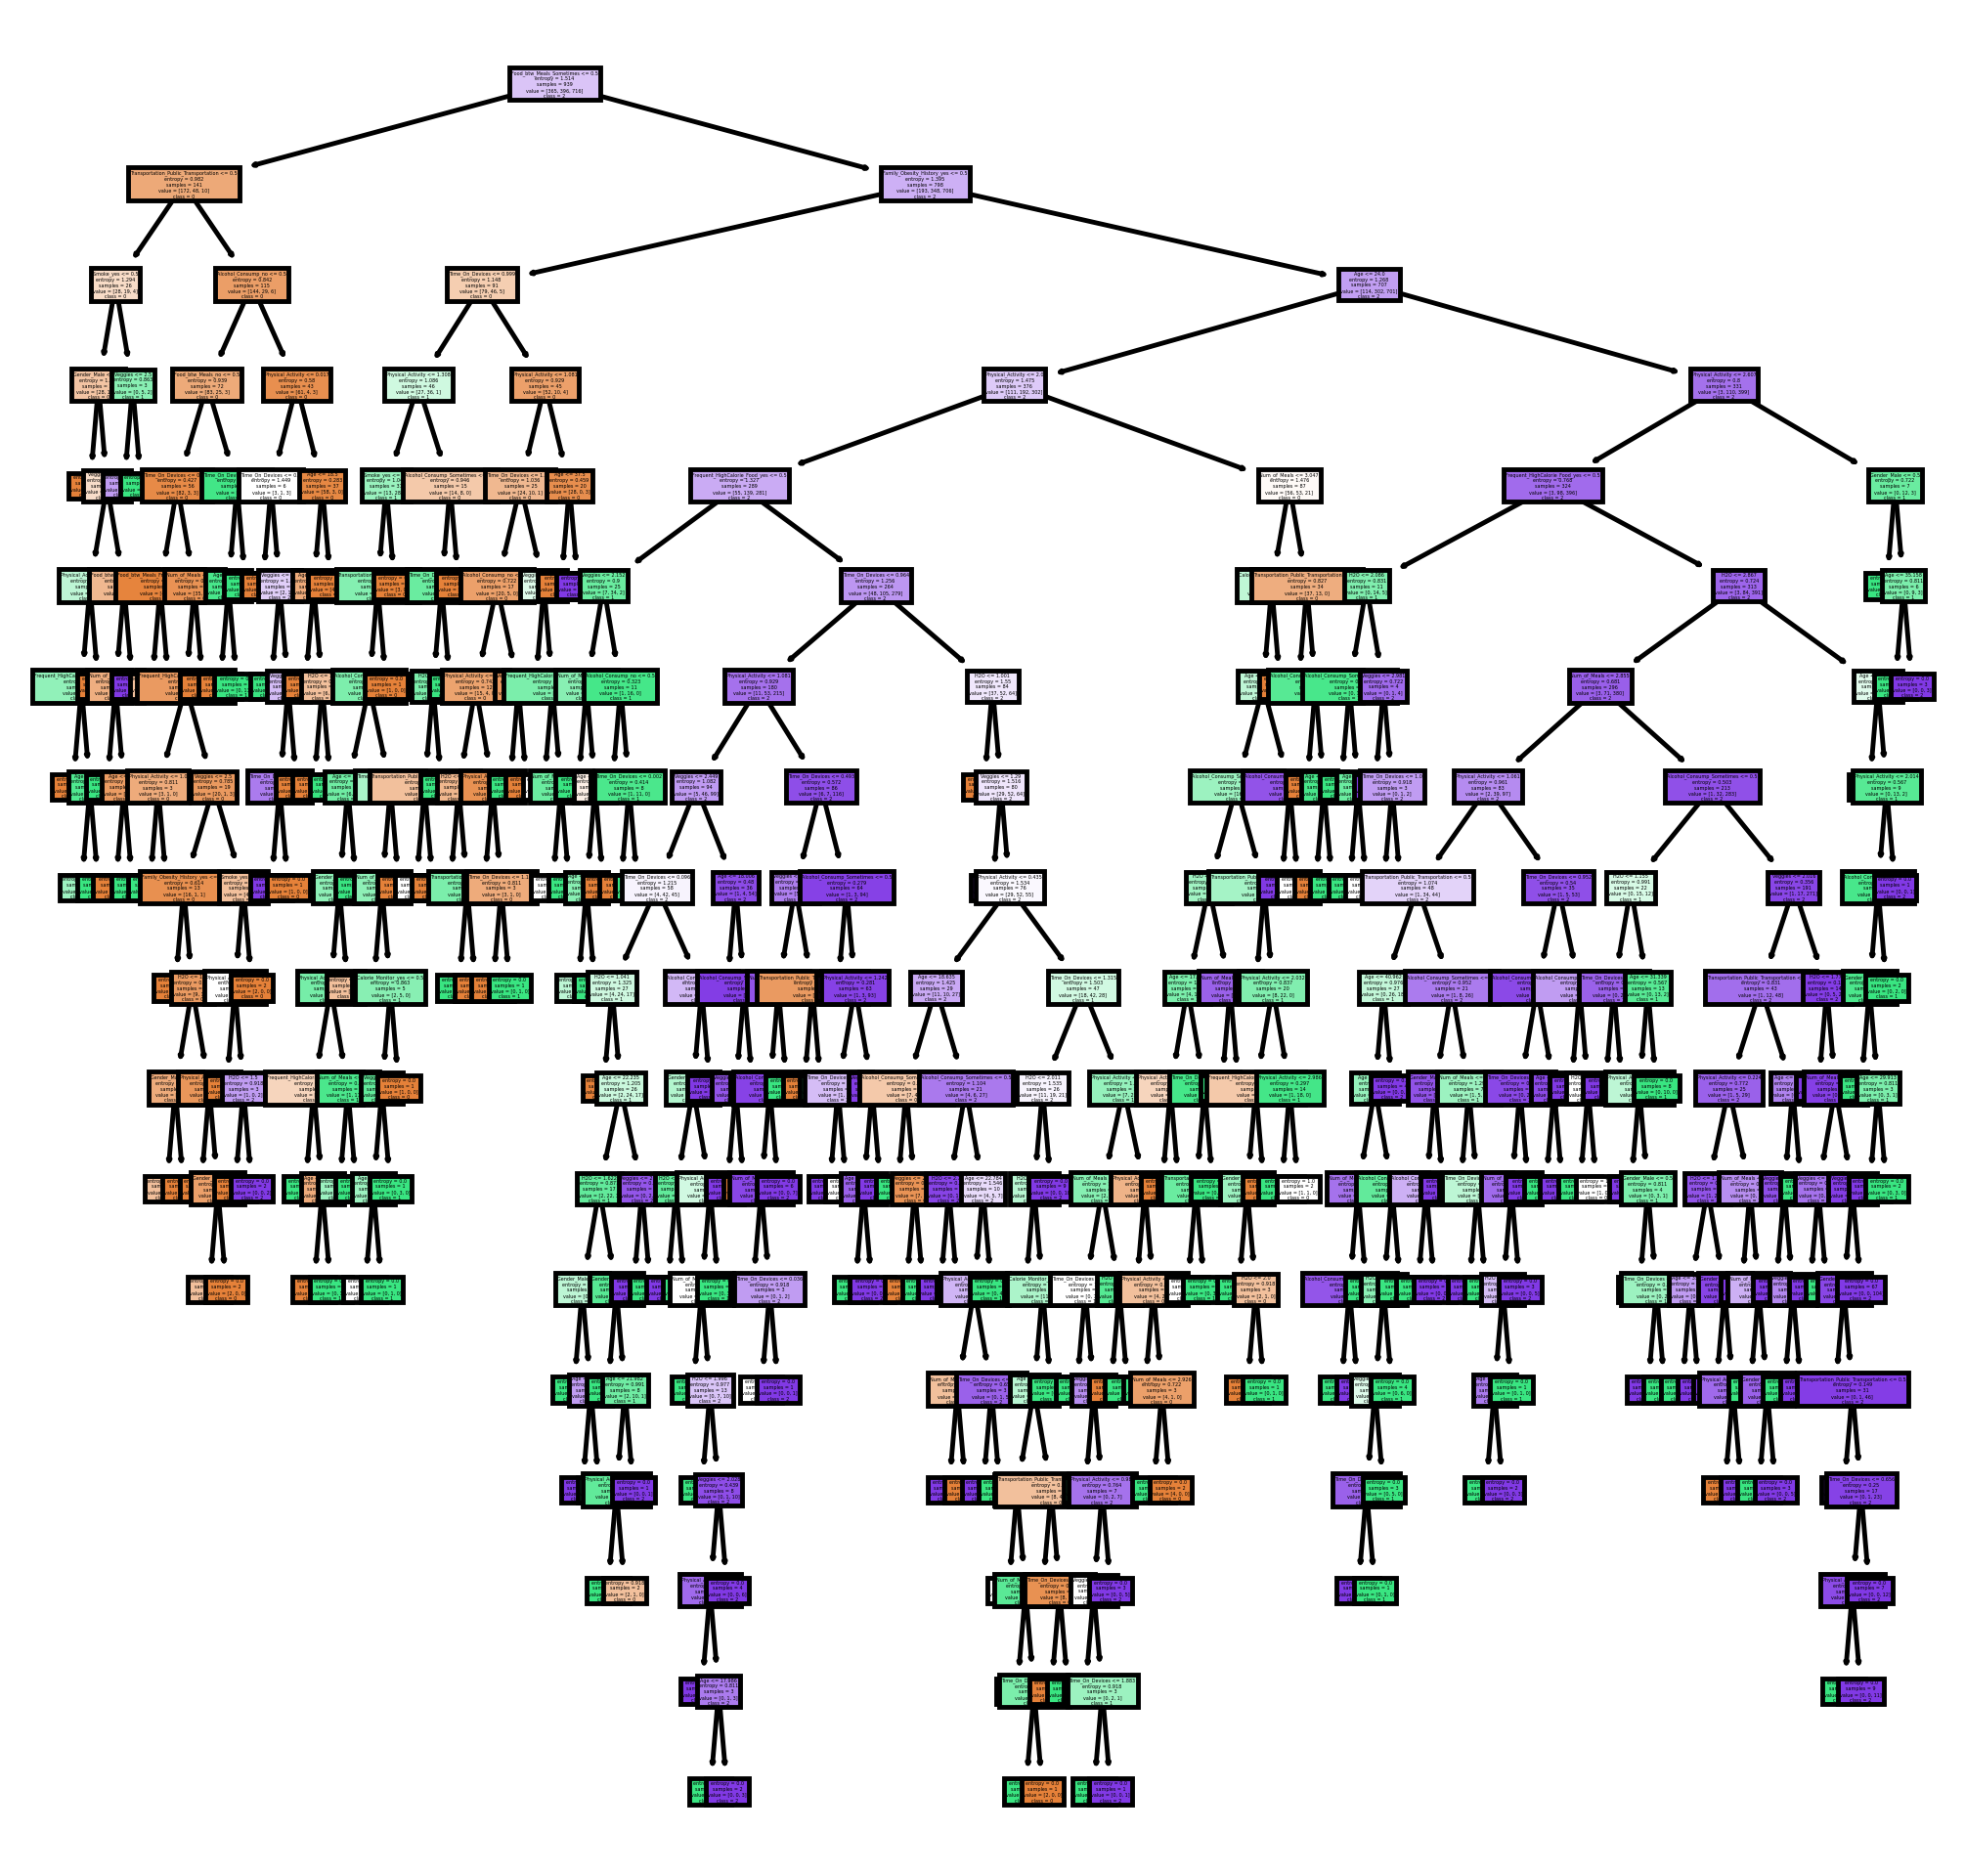

In [69]:
fig=plt.subplots(nrows=1, ncols=1, figsize=(7, 7), dpi=350)
tree_plot=tree.plot_tree(rforest2.estimators_[0], feature_names=X_train_ohe2.columns, class_names=np.unique(y_train2).astype('str'), filled=True)
plt.show()

I performed two grid searches because I now had to compare the SMOTE'd and un-SMOTE'd versions of the dataset. After performing a grid search on the un-SMOTE'd data, we are unable to see a general increase in both the recall and the precision. It however, decreased the precision rate of 'Normal Weight' category by .01 and increased the precision rate of 'Overweight' category by .01 as well. <br><br>
The biggest difference between the two sets of data are the importance factor of each variable. SMOTE'd data had shown that variables such as Age, and Family History of Obesity were the most important variables in the model. The un-SMOTE'd data agrees with the SMOTE'd data in that Age is the most important factor in determining a person's obesity level, but also considers variables such as Number of Meals, Physical Activity, Time on Electronic Devices, Vegetable Consumption, and Water Consumption to be more important than Family History of Obesity. It should be noted that these variables were the SMOTE'd categorical variables that were now considered as numerical variables. 

## K-Nearest-Neighbors

Using the KNN classifier, we are able to determine the accuracy scores of our model. We can observe that as the weight level becomes more normal, the accuracy of our predictions become lower, and as we go towards the extremes of the weight level, our predictions become much more accurate. 

### Standard Scaler

In order to use the K nearest neighbors classifier and logistic regression, the numerical variables had to be scaled down. To avoid having the categorical variables scaled as well, column names are specified

In [70]:
#Standard Scaler
scaler=StandardScaler()
cols=['Age']
# columns that need to be scaled are labeled so that categorical data isn't scaled as well
scale = scaler.fit(X_train_ohe[cols])

# transform the training data columns
X_train_ohe[cols] = scale.transform(X_train_ohe[cols])
# transform the testing data columns
X_test_ohe[cols] = scale.transform(X_test_ohe[cols])

In [71]:
cols2=['Age','Veggies','H2O','Physical_Activity','Num_of_Meals','Time_On_Devices']
scale_unsmote=scaler.fit(X_train_ohe2[cols2])
X_train_ohe2[cols2] = scale_unsmote.transform(X_train_ohe2[cols2])
X_test_ohe2[cols2] = scale_unsmote.transform(X_test_ohe2[cols2])

Because there were far more numerical variables in the un-SMOTE'd dataset, I created another list of columns to be scaled using standard scaler.
<br>
### Modeling 

 - SMOTE'd version of the model: knn, knn_gs
 
 - un-SMOTE'd version of the model: knn2, knn_gs2

##### SMOTE'd

               precision    recall  f1-score   support

Normal_Weight       0.82      0.72      0.77       175
   Overweight       0.66      0.53      0.58       175
        Obese       0.75      0.90      0.82       283

     accuracy                           0.75       633
    macro avg       0.74      0.72      0.72       633
 weighted avg       0.75      0.75      0.74       633

Training Score: 0.84
Test Score: 0.75


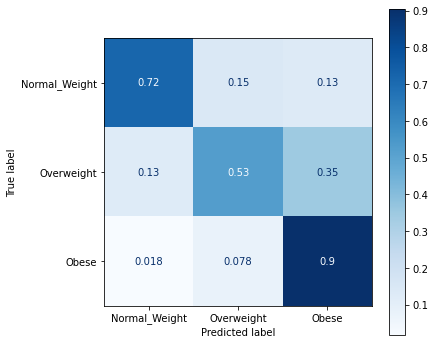

In [72]:
# K Nearest Neighbors
knn=KNeighborsClassifier()
knn.fit(X_train_ohe, y_train)
model_score(knn, X_train_ohe, X_test_ohe, y_train, y_test, label=label)

##### Un-SMOTE'd

               precision    recall  f1-score   support

Normal_Weight       0.86      0.73      0.79       175
   Overweight       0.77      0.66      0.71       175
        Obese       0.80      0.95      0.87       283

     accuracy                           0.81       633
    macro avg       0.81      0.78      0.79       633
 weighted avg       0.81      0.81      0.80       633

Training Score: 0.88
Test Score: 0.81


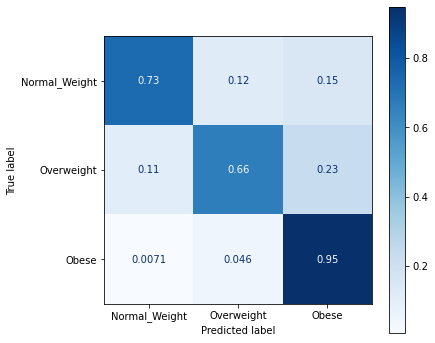

In [73]:
knn2=KNeighborsClassifier()
knn2.fit(X_train_ohe2, y_train2)
model_score(knn2, X_train_ohe2, X_test_ohe2, y_train2, y_test2, label=label)

Created another KNN classifier so there can be a distinction when using grid search to improve precision and recall.<br>
As was with the case with Random Forest, un-SMOTE'd data gave a more favorable result compared to SMOTE'd data. 

### KNN Grid Search 


##### SMOTE'd

In [74]:
param_grid_knn = {
    'n_neighbors': list(range(1,38, 2)),#[3, 5, 7, 13, 19, 25, 37],
    'weights': ['uniform', 'distance'],
    'metric':['minkowski','euclidean',' manhattan']
}

gs_knn = GridSearchCV(knn, param_grid_knn)#, scoring='f1')
gs_knn.fit(X_train_ohe, y_train)

gs_knn.best_params_

F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric ' manhattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can

F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric ' manhattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can

F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric ' manhattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

               precision    recall  f1-score   support

Normal_Weight       0.81      0.73      0.77       175
   Overweight       0.75      0.67      0.71       175
        Obese       0.81      0.92      0.86       283

     accuracy                           0.80       633
    macro avg       0.79      0.77      0.78       633
 weighted avg       0.79      0.80      0.79       633

Training Score: 1.0
Test Score: 0.8


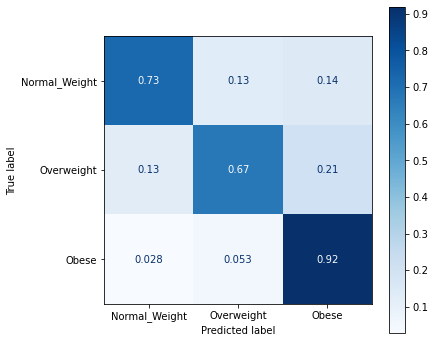

In [75]:
knn_gs=KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn_gs.fit(X_train_ohe, y_train)
model_score(knn_gs, X_train_ohe, X_test_ohe, y_train, y_test, label=label)

##### Un-SMOTE'd

In [76]:
param_grid_knn = {
    'n_neighbors': list(range(1,38, 2)),#[3, 5, 7, 13, 19, 25, 37],
    'weights': ['uniform', 'distance'],
    'metric':['minkowski','euclidean',' manhattan']
}

gs_knn2 = GridSearchCV(knn2, param_grid_knn)#, scoring='f1')
gs_knn2.fit(X_train_ohe2, y_train2)

gs_knn2.best_params_



F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric ' manhattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can

F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric ' manhattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can

F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric ' manhattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

               precision    recall  f1-score   support

Normal_Weight       0.84      0.77      0.80       175
   Overweight       0.80      0.75      0.78       175
        Obese       0.86      0.94      0.90       283

     accuracy                           0.84       633
    macro avg       0.83      0.82      0.83       633
 weighted avg       0.84      0.84      0.84       633

Training Score: 1.0
Test Score: 0.84


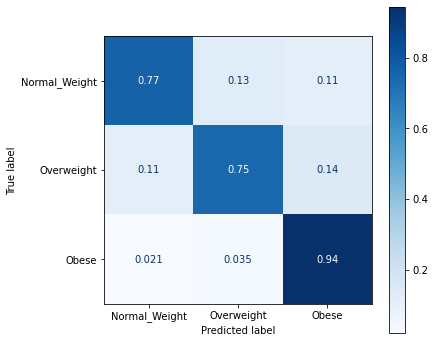

In [77]:
knn_gs2=KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn_gs2.fit(X_train_ohe2, y_train2)
model_score(knn_gs2, X_train_ohe2, X_test_ohe2, y_train2, y_test2, label=label)

After performing the grid search on both SMOTE'd and un-SMOTE'd data, the results reflect previous findings that un-SMOTE'd data performs better. The recall rate for both datasets have seen significant increase in the 'Overweight' category and a slight increase for the 'Normal Weight' category. Interestingly, the recall rate for the 'Obese' category for the un-SMOTE'd data saw a decrease of .01. While the decrease is not significant, especially when comparing it to the overall increase in other categories, it was nonetheless an interesting observation. 

## Logistic Regression



### Min-Max Scaler

Even after our data had been scaled, logistic regression requires that our variables be between 0 and 1. Because of this, we have to normalize our data by subtracting the smallest value of the variable from the current variable and dividing the difference by the largest value of the variable minus the smallest value of the variable. But first, we need to create another function called get_coef which will help plot the coefficients of each variables.

In [56]:
def get_coef(model, X, i=0):
    df=pd.DataFrame()
    coef= pd.Series(model.coef_[i:i+1].flatten(), index=X.columns)
    return coef

In [78]:
minmaxer=MinMaxScaler()
cols=['Age']
minmax=minmaxer.fit(X_train_ohe[cols])
X_train_ohe[cols] = minmax.transform(X_train_ohe[cols])
X_test_ohe[cols] = minmax.transform(X_test_ohe[cols])

In [79]:
minmaxer2=MinMaxScaler()
cols2=['Age','Veggies','H2O','Physical_Activity','Num_of_Meals','Time_On_Devices']
minmax2=minmaxer2.fit(X_train_ohe2[cols2])
X_train_ohe2[cols2] = minmax2.transform(X_train_ohe2[cols2])
X_test_ohe2[cols2] = minmax2.transform(X_test_ohe2[cols2])

### Modeling

 - SMOTE'd version of the model: log_smote, log_smote2
 
 - un-SMOTE'd version of the model: log, log2

##### SMOTE'd

               precision    recall  f1-score   support

Normal_Weight       0.78      0.75      0.76       175
   Overweight       0.53      0.31      0.39       175
        Obese       0.69      0.89      0.78       283

     accuracy                           0.69       633
    macro avg       0.67      0.65      0.64       633
 weighted avg       0.67      0.69      0.67       633

Training Score: 0.73
Test Score: 0.69


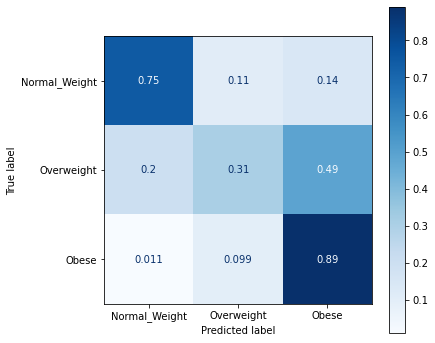

In [80]:
# logistic regression
log_smote = LogisticRegression(C=1e9, solver='saga', multi_class='multinomial')
log_smote.fit(X_train_ohe, y_train)
model_score(log_smote, X_train_ohe, X_test_ohe, y_train, y_test, label=label)

##### Un-SMOTE'd

               precision    recall  f1-score   support

Normal_Weight       0.80      0.76      0.78       175
   Overweight       0.56      0.27      0.37       175
        Obese       0.68      0.92      0.78       283

     accuracy                           0.70       633
    macro avg       0.68      0.65      0.64       633
 weighted avg       0.68      0.70      0.67       633

Training Score: 0.71
Test Score: 0.7


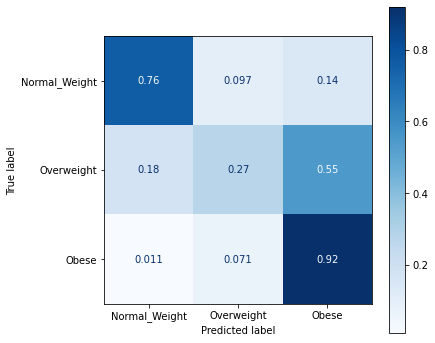

In [81]:
log = LogisticRegression(C=1e9, solver='saga', multi_class='multinomial')
log.fit(X_train_ohe2, y_train2)
model_score(log, X_train_ohe2, X_test_ohe2, y_train2, y_test2, label=label)

### Log Regression Grid Search 

##### SMOTE'd

In [104]:
log_smote2 = LogisticRegressionCV(cv=5, solver='saga', multi_class='auto', scoring='recall_macro', max_iter=200)
log_smote2.fit(X_train_ohe, y_train)

F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was rea

LogisticRegressionCV(cv=5, max_iter=200, scoring='recall_macro', solver='saga')

               precision    recall  f1-score   support

Normal_Weight       0.77      0.75      0.76       175
   Overweight       0.54      0.30      0.39       175
        Obese       0.69      0.89      0.78       283

     accuracy                           0.69       633
    macro avg       0.67      0.65      0.64       633
 weighted avg       0.67      0.69      0.67       633

Training Score: 0.7
Test Score: 0.65


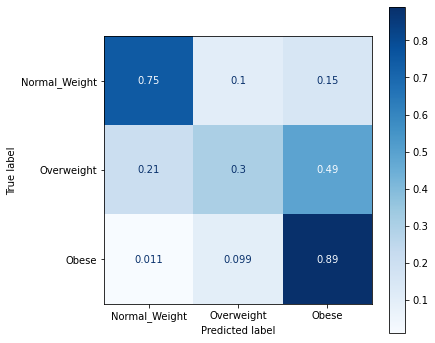

In [105]:
model_score(log_smote2, X_train_ohe, X_test_ohe, y_train, y_test, label=label)

<AxesSubplot:>

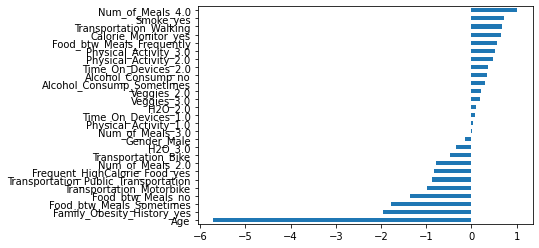

In [83]:
# regression coefficients
# since each obesity level had to be compared with the level below it to see how each

coef0 = get_coef(log_smote2, X_train_ohe, 0)
coef1 = get_coef(log_smote2, X_train_ohe, 1)
coef2 = get_coef(log_smote2, X_train_ohe, 2)


coef0.sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:>

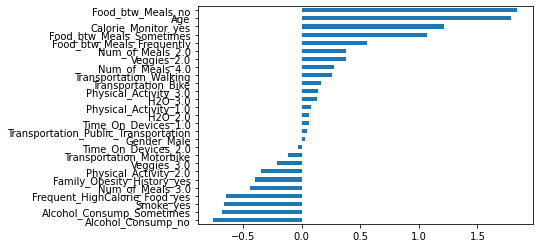

In [84]:
coef1.sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:>

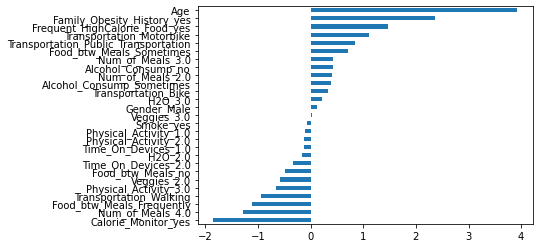

In [85]:
coef2.sort_values(ascending=True).plot(kind='barh')

In [86]:
X0=pd.Series(coef0, index=X_train_ohe.columns)
X1=pd.Series(coef1, index=X_train_ohe.columns)
X2=pd.Series(coef2, index=X_train_ohe.columns)
# X0,X1,X2

In [87]:
odds0=np.exp(coef0)
odds1=np.exp(coef1)
odds2=np.exp(coef2)

<AxesSubplot:>

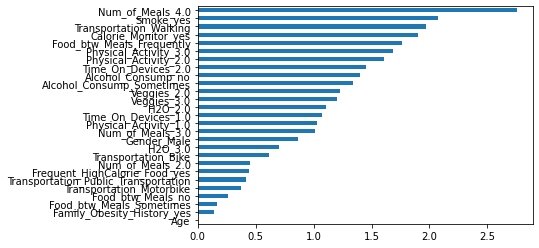

In [88]:
odds0.sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:>

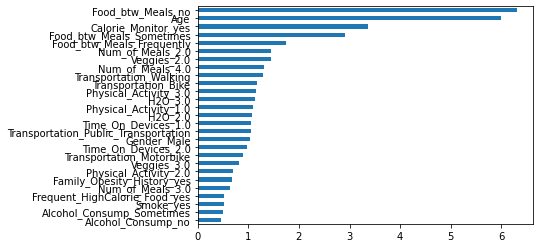

In [89]:
odds1.sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:>

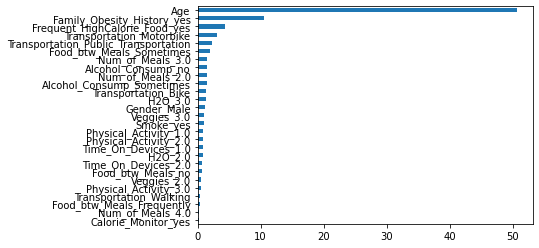

In [90]:
odds2.sort_values(ascending=True).plot(kind='barh')

After the SMOTE'd version of the data was fit to Logistic Regression, we need to fit the un-SMOTE'd dataset.

##### Un-SMOTE'd

In [106]:
log2 = LogisticRegressionCV(cv=5, solver='saga', multi_class='auto', scoring='recall_macro', max_iter=200)
log2.fit(X_train_ohe2, y_train2)

F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was rea

LogisticRegressionCV(cv=5, max_iter=200, scoring='recall_macro', solver='saga')

               precision    recall  f1-score   support

Normal_Weight       0.80      0.76      0.78       175
   Overweight       0.56      0.27      0.37       175
        Obese       0.68      0.92      0.78       283

     accuracy                           0.70       633
    macro avg       0.68      0.65      0.64       633
 weighted avg       0.68      0.70      0.67       633

Training Score: 0.67
Test Score: 0.65


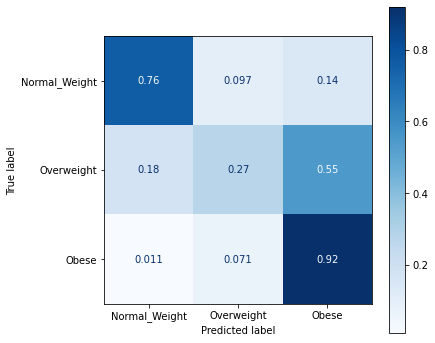

In [107]:
model_score(log2, X_train_ohe2, X_test_ohe2, y_train2, y_test2, label=label)

Interestingly, the un-SMOTE'd data doesn't perform better than the SMOTE'd data. The recall rate for categories 'Normal Weight' and 'Obese' increase by .01 and .03 respectively. The 'Overweight' category performs very poorly for both SMOTE'd and un-SMOTE'd; however, its recall rate was decreased by .04. This may not seem like a large decrease, but the SMOTE'd 'Overweight' category had a recall rate of .31 and a decrease of .04 is more than 10% decrease in recall rate. <br>
In terms of precision, the un-SMOTE'd data performed slightly better than the SMOTE'd data. 

<AxesSubplot:>

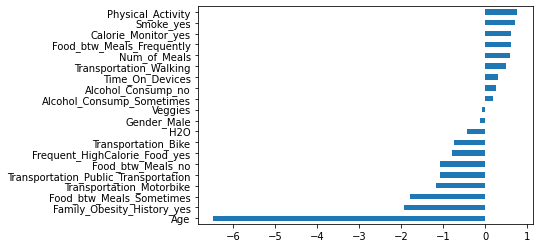

In [92]:
coef0_2 = get_coef(log2, X_train_ohe2, 0)
coef1_2 = get_coef(log2, X_train_ohe2, 1)
coef2_2 = get_coef(log2, X_train_ohe2, 2)

coef0_2.sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:>

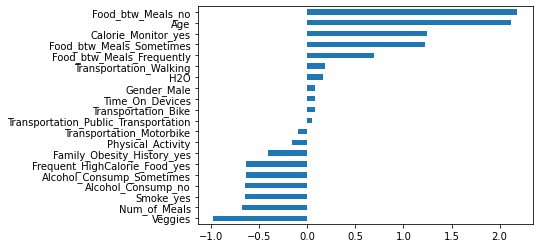

In [93]:
coef1_2.sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:>

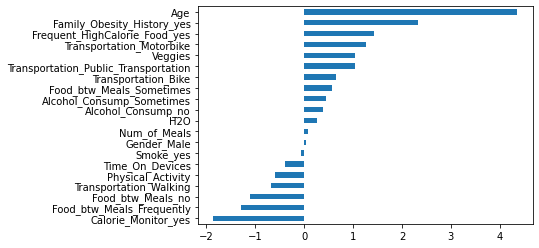

In [94]:
coef2_2.sort_values(ascending=True).plot(kind='barh')

In [95]:
X0_2=pd.Series(coef0_2, index=X_train_ohe2.columns)
X1_2=pd.Series(coef1_2, index=X_train_ohe2.columns)
X2_2=pd.Series(coef2_2, index=X_train_ohe2.columns)

In [110]:
odds0_2=np.exp(coef0_2)
odds1_2=np.exp(coef1_2)
odds2_2=np.exp(coef2_2)

<AxesSubplot:>

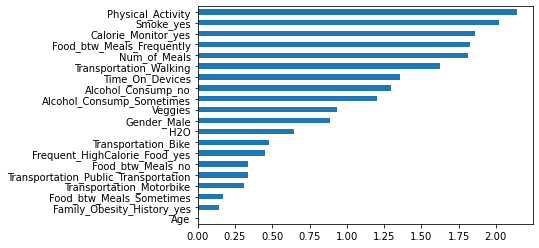

In [111]:
odds0_2.sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:>

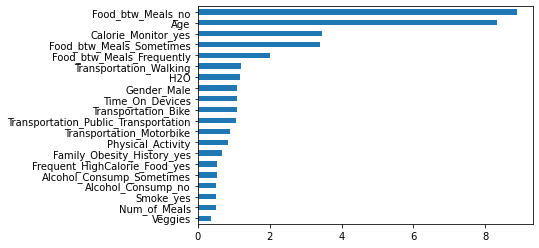

In [98]:
odds1_2.sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:>

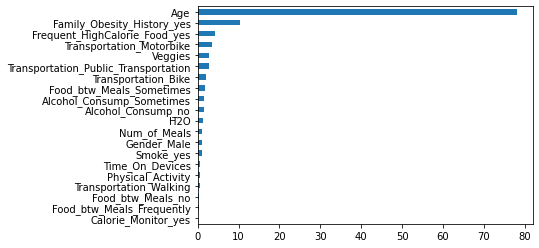

In [99]:
odds2_2.sort_values(ascending=True).plot(kind='barh')

When comparing the odds between the two versions of the data, the most pronounced difference can be seen when comparing the odds between the 'Normal Weight' category and the 'Overweight' category. After the data had been un-SMOTE'd, we can observe that the odds of physical activity increase. But overall, each variables' odds of being in the next weight category is not much different between the two variants of the dataset.

## Conclusion

The biggest challenge for this project was determining how the variables needed to be modified in order to get reasonable outcomes. For example, the dependent variable initially had seven different possible outcomes. Insufficient weight, normal weight, overweight types 1 and 2, and obesity levels of 1, 2, and 3. By reducing the number of possible outcomes to 3: normal weight, overweight, and obese; confusion matrices of the random forest, k nearest neighbors, and the logistic regression models were able to return a clearer and easy to understand outputs. In the SMOTE'd version of the data, we are able to see that age and family history of obesity play the largest role in determining a person's obesity level through random forest and k-nearest-neighbors models. <br>

After un-SMOTE'ing the data, age continuously proved to be the most determining factor, but more controllable factors such as reducing the number of meals or eating vegetables were shown to also have a large impact on a person's obesity level. <br>

For both the SMOTE'd and un-SMOTE'd versions of the data, the logistic regression model did not perform as well especially when predicting individuals in the Obese category. The reason is because logistic regression models specialize in binary data, but ours had three possible outcomes. When taking this into account, the logistic regression model performed well. Since the confusion matrix did not offer much insight, we shift our attention to the regression coefficients. These coefficients tells us how much effect each variable has when comparing between different obesity levels. 

Overall, I found that random forest was able to provide the most accurate results; however, for both the random forest and the k nearest neighbors, the models are over-fitted as can be seen through the high training scores above the confusion matrices. Therefore, the random forest model may have such higher accuracy only on this specific dataset.  

 - **Uncontrollable Factors:** Some factors such as family history of obesity and age seemed to play the biggest role in a person's obesity level. Gender also seemed to play a rather significant role as males tended to be in a higher obesity level than females. This could be due to gender stereotypes, but further research needs to be made to have a better understanding of such factors. 
 <br> <br>
 - **Controllable Factors:** As can be seen in the random forest models, dietary habits affect a person's obesity level the most after age. Eating between meals and frequently consuming high caloric food were the biggest factor in increasing a person's obesity level. Though it may be correlated to the frequency of high calorie food, eating less vegetables also had an impact in increasing a person's obesity level. 

### Next Steps

 - **Other Possible Correlations:** If further research were to be performed, I believe that looking into some correlation between the different lifestyle choices and eating habits of a person could better represent how each variable affects a person's obesity level. 
<br>

 
### Recommendation
In this section, I plan on recommending which models seem to be the best for the clients depending on what the client is looking for, as well as recommending what individuals should do to lower their weight category. 

#### Random Forest
 - If the goal for the clients is to be able to predict an individual's weight(obesity) category, I would recommend using the random forest model as it was able to provide the highest precision and recall scores. 
 - Another tool that the random forest model provides is the feature importance, or the extent in which the variables affect a person's weight category. 
 
#### Habit Recommendations
 - While it seems obvious that healthier lifestyle choices such as eating more vegetables, drinking sufficient amounts of water, or eating less high caloric food will reduce a person's obesity level, we are now able to quantify how much these habits affect a person's obesity level. Even habits such as calorie counting was shown to have a positive impact. It's always easier said than done, but by making small changes to our daily habits, we could see gradual improvements.